In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2

import os

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


Using TensorFlow backend.


In [7]:
pip install opencv-python 

    100% |████████████████████████████████| 51.6MB 1.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install opencv-contrib-python

    100% |████████████████████████████████| 61.5MB 944kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
import cv2

In [40]:
infected_cells=glob.glob("./cell_images/Parasitized/*.png")
uninfected_cells=glob.glob("./cell_images/Uninfected/*.png")

In [41]:
infected_cells

['./cell_images/Parasitized/C118P79ThinF_IMG_20151002_105018_cell_150.png',
 './cell_images/Parasitized/C189P150ThinF_IMG_20151203_142224_cell_84.png',
 './cell_images/Parasitized/C91P52ThinF_IMG_20150821_123116_cell_189.png',
 './cell_images/Parasitized/C84P45ThinF_IMG_20150818_101226_cell_98.png',
 './cell_images/Parasitized/C144P105ThinF_IMG_20151015_163432_cell_310.png',
 './cell_images/Parasitized/C136P97ThinF_IMG_20151005_141803_cell_131.png',
 './cell_images/Parasitized/C65P26N_ThinF_IMG_20150818_154050_cell_177.png',
 './cell_images/Parasitized/C60P21thinF_IMG_20150804_105034_cell_105.png',
 './cell_images/Parasitized/C109P70ThinF_IMG_20150930_103811_cell_159.png',
 './cell_images/Parasitized/C176P137NThinF_IMG_20151201_122708_cell_126.png',
 './cell_images/Parasitized/C136P97ThinF_IMG_20151005_142437_cell_119.png',
 './cell_images/Parasitized/C173P134NThinF_IMG_20151130_115733_cell_227.png',
 './cell_images/Parasitized/C85P46ThinF_IMG_20150820_105154_cell_221.png',
 './cell_im

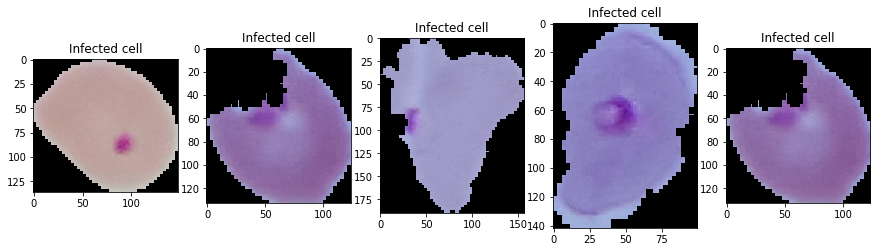

In [42]:
plt.figure(figsize=(15,15))
for i in range(1,6):
    plt.subplot(1,5,i)
    ran=np.random.randint(100)
    plt.imshow(cv2.imread(infected_cells[ran]))
    plt.title('Infected cell')

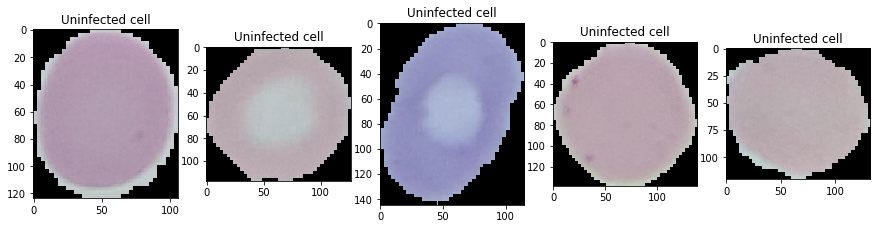

In [43]:
plt.figure(figsize=(15,15))
for i in range(1,6):
    plt.subplot(1,5,i)
    ran=np.random.randint(100)
    plt.imshow(cv2.imread(uninfected_cells[ran]))
    plt.title('Uninfected cell')

In [45]:
#Create feature and response matrix for the image data
image_arr=list()
label=list()

for i in infected_cells:
    img=cv2.imread(i)
    img_res=cv2.resize(img,(64,64))
    image_arr.append(img_res)
    label.append(1)
    
for j in uninfected_cells:
    img=cv2.imread(j)
    img_res=cv2.resize(img,(64,64))
    image_arr.append(img_res)
    label.append(0)

In [46]:
#List to Array Conversion and lengths
image_arr=np.array(image_arr)
label=np.array(label)
image_arr.shape, label.shape

((27558, 64, 64, 3), (27558,))

In [48]:
#Shuffling of data since all 1s' and 0s' have been appended together

image_arr, label = shuffle(image_arr, label, random_state=0)

#Train-Test split

X_train, X_test, y_train, y_test = train_test_split(image_arr,
                                                    label,
                                                    test_size=0.2, 
                                                    random_state=0)

In [66]:
#Image Augmentation
#Generic Image Data Generator
train_generator = ImageDataGenerator(rotation_range=20, 
                                     width_shift_range=0.25,
                                     height_shift_range=0.25,
                                     shear_range=0.2,
                                     zoom_range=0.3,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     rescale=1/255.)
test_generator = ImageDataGenerator(rescale=1/255.)

train_gen = train_generator.flow(X_train,y_train,batch_size=32,shuffle=False)
test_gen = test_generator.flow(X_test,y_test,batch_size=1,shuffle=False)

In [67]:
#Functino to build a neural network

def CNN_neural():
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),strides=1,activation='relu',input_shape=(64,64,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization(axis=-1))
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization(axis=-1))
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization(axis=-1))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [68]:
model = CNN_neural()
model.compile(loss=binary_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False),
             metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 31, 31, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)       

In [69]:
hist = model.fit_generator(train_gen,steps_per_epoch=len(X_train)/32,epochs=25)

Epoch 1/25
689/688 [==============================] - 59s 86ms/step - loss: 0.5974 - acc: 0.7127
Epoch 2/25
689/688 [==============================] - 59s 86ms/step - loss: 0.3526 - acc: 0.8588
Epoch 3/25
689/688 [==============================] - 59s 86ms/step - loss: 0.3025 - acc: 0.8857
Epoch 4/25
689/688 [==============================] - 59s 85ms/step - loss: 0.2879 - acc: 0.8955
Epoch 5/25
689/688 [==============================] - 58s 84ms/step - loss: 0.2743 - acc: 0.8986
Epoch 6/25
689/688 [==============================] - 58s 85ms/step - loss: 0.2703 - acc: 0.9004
Epoch 7/25
689/688 [==============================] - 60s 87ms/step - loss: 0.2585 - acc: 0.9069
Epoch 8/25
689/688 [==============================] - 60s 86ms/step - loss: 0.2556 - acc: 0.9070
Epoch 9/25
689/688 [==============================] - 60s 87ms/step - loss: 0.2553 - acc: 0.9055
Epoch 10/25
689/688 [==============================] - 59s 86ms/step - loss: 0.2538 - acc: 0.9079
Epoch 11/25
689/688 [========

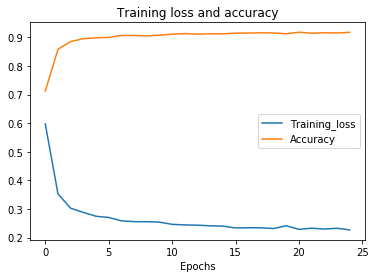

In [72]:
N = 25
plt.plot(np.arange(0,N),hist.history['loss'], label='Training_loss')
plt.plot(np.arange(0,N),hist.history['acc'], label='Accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.legend(loc='right')

In [73]:
#Evaluate thes test error asociated with this model
test_err = model.evaluate_generator(test_gen, steps=len(y_test))

In [ ]:
print('Loss: ',test_err[])